In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os

from sklearn.metrics import classification_report

IMAGE_SIZE = [224, 224]

train_directory=r'C:\Users\VICTUS\Documents\barang\sem6\ftyp2\halal\gambarSebenar\gambarThird\trainData'
test_directory = r'C:\Users\VICTUS\Documents\barang\sem6\ftyp2\halal\gambarSebenar\gambarThird\testData'
val_directory=r'C:\Users\VICTUS\Documents\barang\sem6\ftyp2\halal\gambarSebenar\gambarThird\valData'
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.1,
                                   zoom_range = 0.1,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.1,
                                   zoom_range = 0.1,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory(train_directory,
                                                 target_size = IMAGE_SIZE,
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(val_directory,
                                            target_size = IMAGE_SIZE,
                                            batch_size = 64,
                                            class_mode = 'categorical')


foldersTrain = glob(r'C:\Users\VICTUS\Documents\barang\sem6\ftyp2\halal\gambarSebenar\gambarThird\trainData\*')
#code section for adding the preprocessing layer on the top of VGG16 model
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#loop to set the existing weight to non-trainable
for layer in vgg.layers:
  layer.trainable = False
#code to flatten the VGG output
x = Flatten()(vgg.output)
#code to add Dense the layer
prediction = Dense(len(foldersTrain), activation='softmax')(x)


  # useful for getting number of classes
foldersTrain = glob(r'C:\Users\VICTUS\Documents\barang\sem6\ftyp2\halal\gambarSebenar\gambarThird\trainData\*')
foldersTest = glob(r'C:\Users\VICTUS\Documents\barang\sem6\ftyp2\halal\gambarSebenar\gambarThird\testData\*')
foldersVal = glob(r'C:\Users\VICTUS\Documents\barang\sem6\ftyp2\halal\gambarSebenar\gambarThird\valData\*')
folder_count1 = len(foldersTrain)
folder_count2 = len(foldersTest)
folder_count3 = len(foldersVal)
print(folder_count1)
print(folder_count2)
print(folder_count3)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

x = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Found 9099 images belonging to 3 classes.
Found 1064 images belonging to 3 classes.
3
3
3
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                     

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_4208\1208069414.py:75: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  x = model.fit_generator(


Epoch 1/5
143/143 [==============================] - 854s 6s/step - loss: 0.0803 - accuracy: 0.9731 - val_loss: 0.0319 - val_accuracy: 0.9868
Epoch 2/5
143/143 [==============================] - 848s 6s/step - loss: 0.0089 - accuracy: 0.9992 - val_loss: 0.0217 - val_accuracy: 0.9953
Epoch 3/5
143/143 [==============================] - 846s 6s/step - loss: 0.0046 - accuracy: 0.9997 - val_loss: 0.0160 - val_accuracy: 0.9972
Epoch 4/5
143/143 [==============================] - 977s 7s/step - loss: 0.0028 - accuracy: 0.9999 - val_loss: 0.0159 - val_accuracy: 0.9972
Epoch 5/5
143/143 [==============================] - 1054s 7s/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0131 - val_accuracy: 0.9962


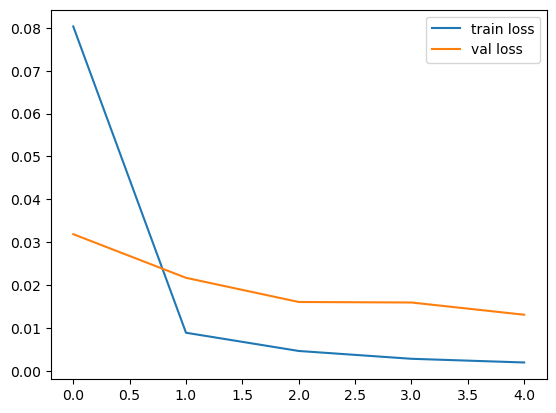

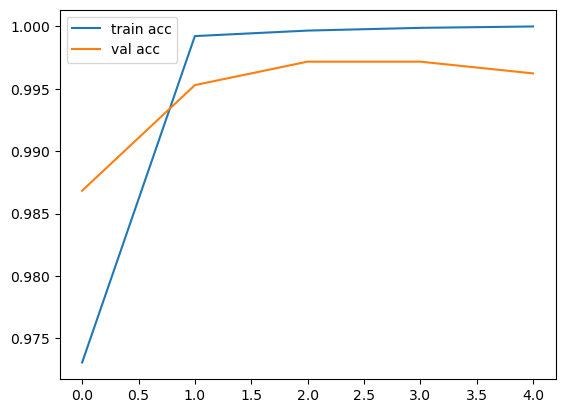

In [2]:
# loss
plt.plot(x.history['loss'], label='train loss')
plt.plot(x.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# accuracies
plt.plot(x.history['accuracy'], label='train acc')
plt.plot(x.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [3]:
test_predictions = model.predict(test_set)
# Convert predictions to class labels
test_predicted_labels = np.argmax(test_predictions, axis=1)

# Get true labels
true_labels = test_set.classes

# Generate classification report
class_report = classification_report(true_labels, test_predicted_labels)
print('Classification Report:')
print(class_report)

17/17 [==============================] - 111s 6s/step
Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.26      0.25       304
           1       0.34      0.34      0.34       376
           2       0.35      0.35      0.35       384

    accuracy                           0.32      1064
   macro avg       0.32      0.32      0.32      1064
weighted avg       0.32      0.32      0.32      1064



In [4]:
model.save('yangBaru.h5')

In [9]:
#try regularizer 


In [ ]:
from keras.layers import Input, Flatten, Dense
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
from keras.regularizers import l2

IMAGE_SIZE = [224, 224]

train_directory = r'C:\Users\VICTUS\Documents\barang\sem6\ftyp2\halal\gambarSebenar\gambarThird\trainData'
test_directory = r'C:\Users\VICTUS\Documents\barang\sem6\ftyp2\halal\gambarSebenar\gambarThird\testData'
val_directory = r'C:\Users\VICTUS\Documents\barang\sem6\ftyp2\halal\gambarSebenar\gambarThird\valData'

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.1, zoom_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.1, zoom_range=0.1, horizontal_flip=True)

training_set = train_datagen.flow_from_directory(train_directory, target_size=IMAGE_SIZE, batch_size=256, class_mode='categorical')
test_set = test_datagen.flow_from_directory(test_directory, target_size=IMAGE_SIZE, batch_size=256, class_mode='categorical')

foldersTrain = glob(r'C:\Users\VICTUS\Documents\barang\sem6\ftyp2\halal\gambarSebenar\gambarThird\trainData\*')
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
prediction = Dense(len(foldersTrain), activation='softmax', kernel_regularizer=l2(0.01))(x)

model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

x = model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)


Found 6010 images belonging to 2 classes.
Found 768 images belonging to 2 classes.
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                            

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_22392\1984159389.py:35: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  x = model.fit_generator(


Epoch 1/10


In [16]:
test_predictions = model.predict(test_set)
# Convert predictions to class labels
test_predicted_labels = np.argmax(test_predictions, axis=1)

# Get true labels
true_labels = test_set.classes

# Generate classification report
class_report = classification_report(true_labels, test_predicted_labels)
print('Classification Report:')
print(class_report)

17/17 [==============================] - 46s 3s/step
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.56      0.54       136
           1       0.51      0.47      0.49       132

    accuracy                           0.51       268
   macro avg       0.51      0.51      0.51       268
weighted avg       0.51      0.51      0.51       268



In [1]:
#try unsupervised


In [ ]:
from keras.layers import Input, Flatten, Dense, Reshape
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
from keras.regularizers import l2

IMAGE_SIZE = [224, 224]

train_directory = r'C:\Users\VICTUS\Documents\barang\sem6\ftyp2\halal\gambarSebenar\gambarThird\trainData'
test_directory = r'C:\Users\VICTUS\Documents\barang\sem6\ftyp2\halal\gambarSebenar\gambarThird\testData'
val_directory = r'C:\Users\VICTUS\Documents\barang\sem6\ftyp2\halal\gambarSebenar\gambarThird\valData'

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.1, zoom_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.1, zoom_range=0.1, horizontal_flip=True)

training_set = train_datagen.flow_from_directory(train_directory, target_size=IMAGE_SIZE, batch_size=256, class_mode='input')
test_set = test_datagen.flow_from_directory(test_directory, target_size=IMAGE_SIZE, batch_size=256, class_mode='input')

foldersTrain = glob(r'C:\Users\VICTUS\Documents\barang\sem6\ftyp2\halal\gambarSebenar\gambarThird\trainData\*')
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
encoded = Dense(128, activation='relu')(x)  # Compressed representation

# Decoder
decoded = Dense(25088, activation='sigmoid')(encoded)
decoded = Reshape((7, 7, 512))(decoded)

for layer in vgg.layers[1:]:
    layer.trainable = True

# Autoencoder Model
autoencoder = Model(inputs=vgg.input, outputs=decoded)

autoencoder.compile(loss='mse', optimizer='adam')  # Using Mean Squared Error as loss for the autoencoder

autoencoder.summary()

# Train the Autoencoder
autoencoder.fit(
    training_set,
    epochs=10,
    steps_per_epoch=len(training_set),
)

test_predictions = model.predict(test_set)
# Convert predictions to class labels
test_predicted_labels = np.argmax(test_predictions, axis=1)

# Get true labels
true_labels = test_set.classes

# Generate classification report
class_report = classification_report(true_labels, test_predicted_labels)
print('Classification Report:')
print(class_report)


Found 6010 images belonging to 2 classes.
Found 768 images belonging to 2 classes.
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                          